<a href="https://colab.research.google.com/github/tselane2110/Human-Vs-AI-Generated-Images/blob/main/HumanVsAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alessandrasala79_ai_vs_human_generated_dataset_path = kagglehub.dataset_download('alessandrasala79/ai-vs-human-generated-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
alessandrasala79_ai_vs_human_generated_dataset_path

'/kaggle/input/ai-vs-human-generated-dataset'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/ai-vs-human-generated-dataset/train_data/4b234574506641a7af9db0de4dfed74c.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/922eceb9fbd2442999ccaa0db3c67a64.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/a49a987698fd404c83401b4fe9997aa2.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/0ff64465188f468ea2ced2094703dbbf.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/82d47c09950146f093a125504ff7f9aa.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/ba45303deb7544a389c8d2ab976dc1a8.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/8796e9a1fb884590bda7c29a489db64b.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/84a2720850b94ac1b955bb680ce5769f.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/92af648f0fca4e9aa1215dae70121c42.jpg
/kaggle/input/ai-vs-human-generated-dataset/train_data/ceb9a77a99014f119b7d76a28de4b5e6.jpg
/kaggle/input/ai-vs-human-gen

In [4]:
import os

print("Is this Kaggle?", os.path.exists("/kaggle/input"))

Is this Kaggle? True


In [5]:
import os

base_path = "/kaggle/input/ai-vs-human-generated-dataset"

# List everything in the base directory
print("Contents of the dataset directory:")
for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)
    if os.path.isdir(item_path):
        print(f"📁 {item}/")
        # List up to 5 files from each subfolder
        sample_files = os.listdir(item_path)[:5]
        for file in sample_files:
            print(f"   └── {file}")
    else:
        print(f"📄 {item}")


Contents of the dataset directory:
📁 test_data_v2/
   └── 37a05f4fddf84ac6bd2a9d49446c4c95.jpg
   └── 3e74f0546c5d4b7797aca68370e6ccf0.jpg
   └── 8e2aaa5b998a423e9c90df1c474a5351.jpg
   └── 47e9890ed55947ebb7cbe71c1fe24171.jpg
   └── c40c353852d944f6b555413b89706eba.jpg
📄 train.csv
📄 test.csv
📁 train_data/
   └── 4139638fb5604b3e89cf871ad247203c.jpg
   └── 0267b475538e460197576f34d657257b.jpg
   └── 8dc94363c2ca4f688292cc83aa6751da.jpg
   └── b3e8962eee154f0cabe88661224e50ff.jpg
   └── 7eb7c1a51ecb496ab6b1eedfd578cfaa.jpg


In [6]:
import pandas as pd

csv_path = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"

# Load the CSV
df = pd.read_csv(csv_path)

# Show the first few rows
df.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


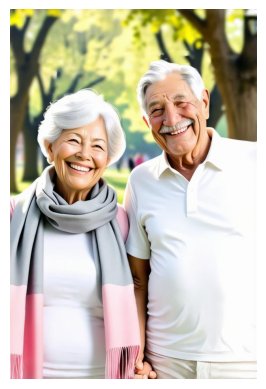

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/kaggle/input/ai-vs-human-generated-dataset/train_data/a6dcb93f596a43249135678dfcfc17ea.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()


In [8]:
df['label'][df['file_name'] == "train_data/a6dcb93f596a43249135678dfcfc17ea.jpg"]

,label
0,1


In [9]:
df['label'].value_counts()

,count
label,
1,39975
0,39975


In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_random_images(df, label, image_folder, n=5):
    # Get random samples of the given label
    sample_df = df[df['label'] == label].sample(10000)
    # to get the sizes of some images
    sizes = {}
    count = 0

    for _, row in sample_df.iterrows():
        img_path = os.path.join(image_folder, row['file_name'])
        img = Image.open(img_path)
        size = img.size
        if size not in sizes:
          sizes[size] = 1
        else:
          sizes[size] += 1

        # commenting coz we dont need this part of the code rn
        # printing 5 images (as n = 5)
        # if count < n:
        #   plt.imshow(img)
        #   plt.title(label)
        #   plt.axis("off")
        #   plt.show()
        #   count += 1

    return sizes

image_folder = "/kaggle/input/ai-vs-human-generated-dataset/"

# Show 7 random AI images
ai_img_sizes = show_random_images(df, label=1, image_folder=image_folder, n=7)

# Show 7 random real (human) images
notAI_img_sizes = show_random_images(df, label=0, image_folder=image_folder, n=7)

# # printing the sizes
# print(ai_img_sizes)
# print(notAI_img_sizes)

In [12]:
# printing the sizes
# print(ai_img_sizes)
# print(notAI_img_sizes)

The output of the above cell is as follows:

{(768, 512): 5254, (512, 768): 1469, (768, 768): 193, (768, 528): 132, (496, 768): 200, (768, 416): 58, (768, 480): 161, (768, 240): 28, (768, 496): 698, (768, 544): 101, (768, 272): 12, (768, 224): 11, (720, 768): 17, (768, 384): 36, (768, 432): 185, (624, 768): 12, (768, 448): 59, (768, 576): 293, (768, 592): 50, (768, 736): 21, (768, 688): 25, (688, 768): 14, (768, 368): 20, (640, 768): 17, (608, 768): 36, (576, 768): 87, (768, 640): 21, (768, 464): 78, (768, 320): 20, (432, 768): 6, (768, 400): 50, (560, 768): 44, (768, 560): 89, (768, 336): 12, (768, 608): 48, (768, 656): 24, (672, 768): 13, (528, 768): 64, (480, 768): 22, (768, 752): 15, (656, 768): 23, (544, 768): 43, (768, 720): 22, (752, 768): 17, (592, 768): 30, (768, 704): 17, (768, 304): 15, (768, 288): 12, (768, 352): 15, (768, 672): 23, (768, 192): 6, (704, 768): 6, (768, 256): 10, (736, 768): 6, (768, 624): 35, (464, 768): 6, (368, 768): 3, (416, 768): 2, (384, 768): 1, (768, 144): 1, (768, 176): 3, (768, 208): 3, (448, 768): 2, (768, 160): 2, (400, 768): 1, (768, 128): 1}

<br><br>
{(768, 736): 21, (512, 768): 1445, (768, 512): 5230, (768, 656): 19, (432, 768): 6, (768, 256): 12, (528, 768): 53, (576, 768): 118, (768, 400): 52, (768, 480): 173, (768, 496): 649, (768, 576): 315, (496, 768): 195, (768, 768): 211, (768, 608): 55, (768, 544): 115, (768, 640): 30, (688, 768): 18, (560, 768): 47, (768, 560): 89, (608, 768): 37, (768, 592): 50, (768, 528): 132, (768, 384): 37, (768, 448): 50, (640, 768): 21, (768, 224): 9, (768, 464): 94, (768, 720): 25, (768, 432): 180, (768, 336): 20, (768, 672): 24, (768, 416): 58, (592, 768): 22, (768, 688): 27, (448, 768): 4, (656, 768): 12, (768, 624): 26, (624, 768): 16, (768, 352): 16, (672, 768): 13, (704, 768): 4, (544, 768): 46, (768, 368): 18, (768, 704): 22, (768, 304): 15, (752, 768): 15, (768, 240): 36, (768, 752): 16, (768, 288): 10, (768, 320): 17, (464, 768): 6, (768, 192): 4, (736, 768): 12, (384, 768): 1, (768, 272): 12, (480, 768): 21, (768, 112): 1, (768, 128): 1, (720, 768): 10, (416, 768): 1, (352, 768): 1, (768, 208): 1, (768, 176): 1, (768, 160): 1, (400, 768): 2}

